### Explore data

In [37]:
from tqdm import tqdm
import numpy as np

##### FWD

In [57]:
root = 'data/'

for filename in os.listdir(root):
    with open(root + filename) as file:
        train = [line.rstrip('\n') for line in file]

    tr_total, tr_unique, max_len = 0, 0, 0
    all_lens = []
    for line in tqdm(train):
        splitted = line.split('|')
        number, examples = splitted[0], splitted[1]
        examples = examples.split('\t')
        for el in examples:
            len_now = len(el.split(' '))
            if len_now > max_len:
                max_len = len_now
            all_lens.append(len_now)

        tr_total += int(number)
        tr_unique += 1


    print('Total examples generated in ' + filename, f'{tr_total:,}')
    print('Unique examples fed to model in ' + filename, f'{tr_unique:,}')
    print('Max len in ' + filename, max_len)
    print('Mean len in ' + filename, np.mean(all_lens))
    print('-' * 100)

100%|██████████| 9986/9986 [00:00<00:00, 192828.69it/s]


Total examples generated in prim_fwd.valid 1,558,675
Unique examples fed to model in prim_fwd.valid 9,985
Max len in prim_fwd.valid 505
Mean len in prim_fwd.valid 36.8164747120681
----------------------------------------------------------------------------------------------------
Total examples generated in prim_fwd.test 1,237,312
Unique examples fed to model in prim_fwd.test 9,986
Max len in prim_fwd.test 506
Mean len in prim_fwd.test 36.28840376527138
----------------------------------------------------------------------------------------------------


100%|██████████| 45339899/45339899 [04:06<00:00, 184269.46it/s]


Total examples generated in prim_fwd.train 112,106,299
Unique examples fed to model in prim_fwd.train 45,339,899
Max len in prim_fwd.train 510
Mean len in prim_fwd.train 39.564734070362064
----------------------------------------------------------------------------------------------------


### Results and metrics

In [70]:
import seaborn as sns
sns.set()
import os

In [71]:
root = '../dumped/emb_2301/'

runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/emb_2301/188513/train.log


In [72]:
root = '../dumped/pos_emb_0202/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/pos_emb_0202/194320/train.log


In [73]:
root = '../dumped/seq_rel_att_0202/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/seq_rel_att_0202/194322/train.log


In [74]:
root = '../dumped/tree_rel_att_0303/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)

../dumped/tree_rel_att_0303/232394/train.log
../dumped/tree_rel_att_0303/232477/train.log
../dumped/tree_rel_att_0303/232478/train.log
../dumped/tree_rel_att_0303/232479/train.log


In [75]:
'''root = '../dumped/pos_emb_seq_rel_att_0202/'

#runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    print(run_name)
    runs.append(run_name)'''

"root = '../dumped/pos_emb_seq_rel_att_0202/'\n\n#runs = []\nfor filename in os.listdir(root):\n    run_name = root + filename + '/train.log'\n    print(run_name)\n    runs.append(run_name)"

In [76]:
import datetime
import json

is_end=False

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            if len(time) == 1:     # day num
                line_split = line.split()
                day, time = line_split[5], line_split[7]
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = int(day) * 24 + (time.hour * 60 + time.minute) / 60
            else:
                time = datetime.datetime.strptime(time, '%H:%M:%S')
                time = (time.hour * 60 + time.minute) / 60
            if time > 70:
                is_end=True
                break 
            
            whole_dict['time'].append(time)
            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])
    runs_dict[name.split('/')[3]] = whole_dict

In [83]:
#runs_dict.pop('197594')
#runs_dict.pop('197612')
#runs_dict.pop('197593')
#runs_dict.pop('195850')
#runs_dict.pop('195286')
#runs_dict.pop('197641')

runs_dict.pop('197641')   # BS 256
runs_dict.pop('198206')   # BS 256 & lr=0.001
runs_dict.pop('194321')   # seqrel 32
runs_dict.pop('195287')   # seq rel 250 NUM-2',  --- сдвинут по времени
runs_dict.pop('195286')   # pos emb NUM-2'       --- сдвинут по времени
runs_dict.pop('232477')
runs_dict.pop('232479')



names = {'188513':'emb',
         '194320':'pos emb',
         '194321':'seqrel att 32',
         '194322':'seqrel att 250',
         '194323':'pos emb + seqrel 32',
         '194324':'pos emb + seqrel 250',
         '195286':'pos emb NUM-2 Failed',
         '195287':'seq rel 250 NUM-2 Failed',
         '195850':'pos emb NUM-3',
         '195851':'seq rel 250 NUM-3',
         '197797':'1',
         '197641':'BS 256',
         '198206':'BS 256 & lr=0.001',
         '204657':'pos emb NUM-2',
         '204694':'seq rel 250 NUM-2',
         '232394':'tree rel mult1 FULL',
         '232478':'tree rel mult2 FULL'
        }


In [84]:
for key_1 in runs_dict.keys():
    for key_2 in runs_dict[key_1].keys():
        runs_dict[key_1][key_2] = runs_dict[key_1][key_2][:275]

### GROUPED

In [20]:
def return_grouped_df(runs_dict, runs_nums):
    new_dict = {}
    for run in runs_nums:
        for key in runs_dict[run].keys():
            if key in new_dict.keys():
                new_dict[key].extend(runs_dict[run][key])
            else:
                new_dict[key] = runs_dict[run][key]
    
    return pd.DataFrame(new_dict)

In [21]:
import pandas as pd

pos_emb_runs = ['194320', '204657', '195850']
pos_emb_df = return_grouped_df(runs_dict, pos_emb_runs)

seq_rel_att_runs = ['194322', '204694', '195851']
seq_rel_att_df = return_grouped_df(runs_dict, seq_rel_att_runs)

In [22]:
needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']

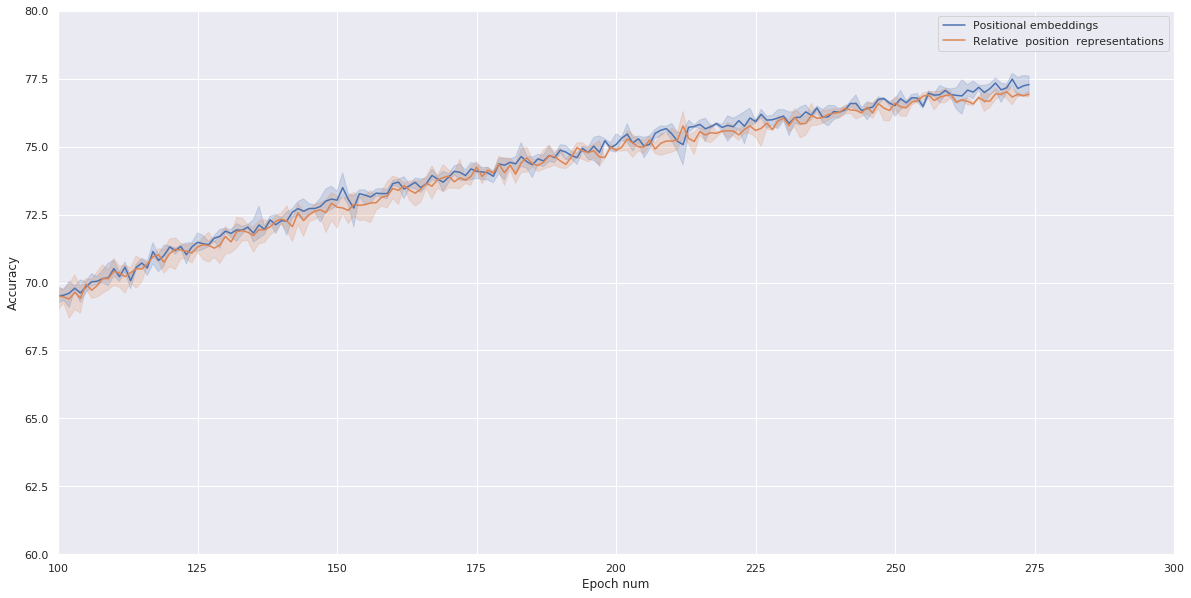

KeyboardInterrupt: 

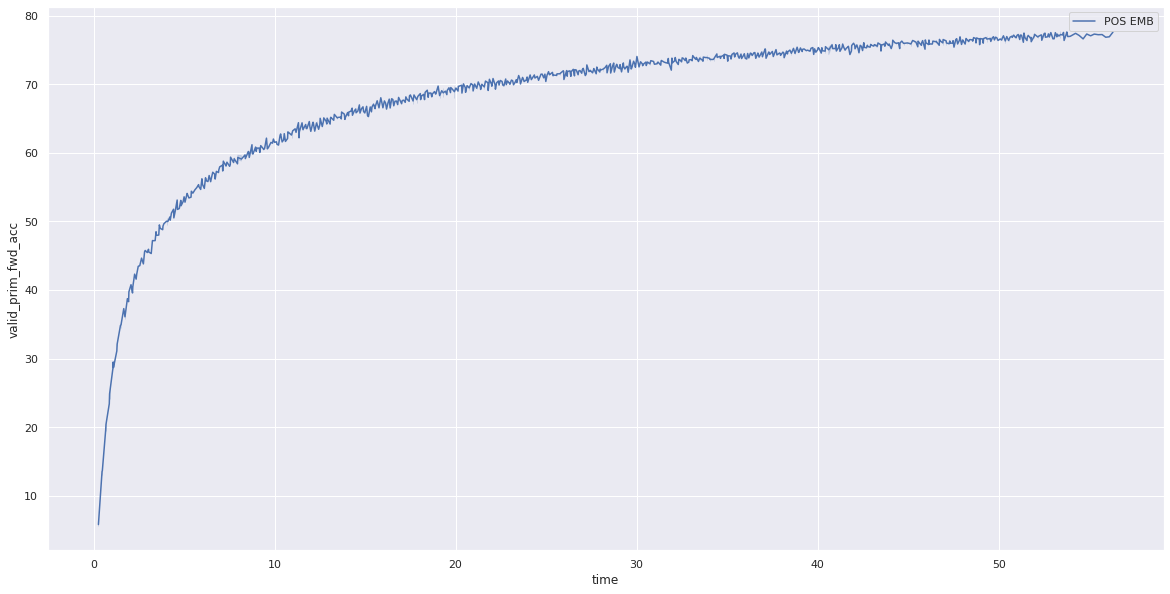

In [27]:
import matplotlib.pyplot as plt

for key in needed:
    ### epoch
    plt.figure(figsize=(20,10))
    sns.lineplot(data=pos_emb_df, x='epoch', y=key, label='Positional embeddings')
    sns.lineplot(data=seq_rel_att_df, x='epoch', y=key, label='Relative  position  representations')
    # accuracy limits 
    plt.xlim(100, 300)
    plt.ylim(60, 80)
    #plt.title('Validation accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch num')
    
    plt.legend()
    plt.show()
    
    ### time
    plt.figure(figsize=(20,10))
    sns.lineplot(data=pos_emb_df, x='time', y=key, label='POS EMB')
    sns.lineplot(data=seq_rel_att_df, x='time', y=key, label='SEQ REL ATT 250 encoder')
    plt.title(key)
    plt.legend()
    plt.show()

### USUAL

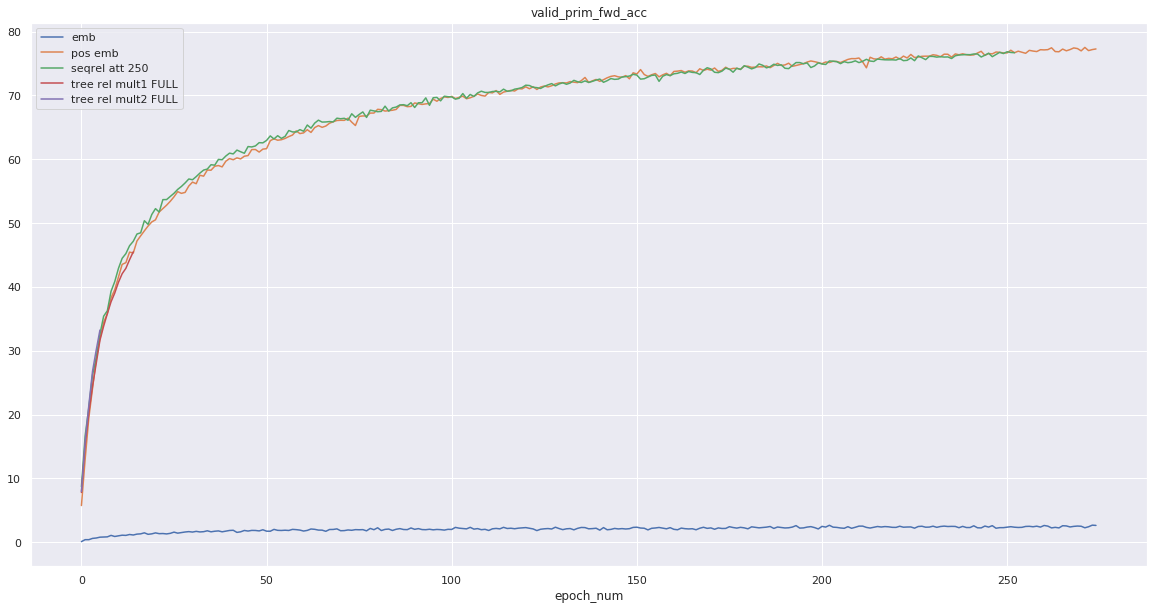

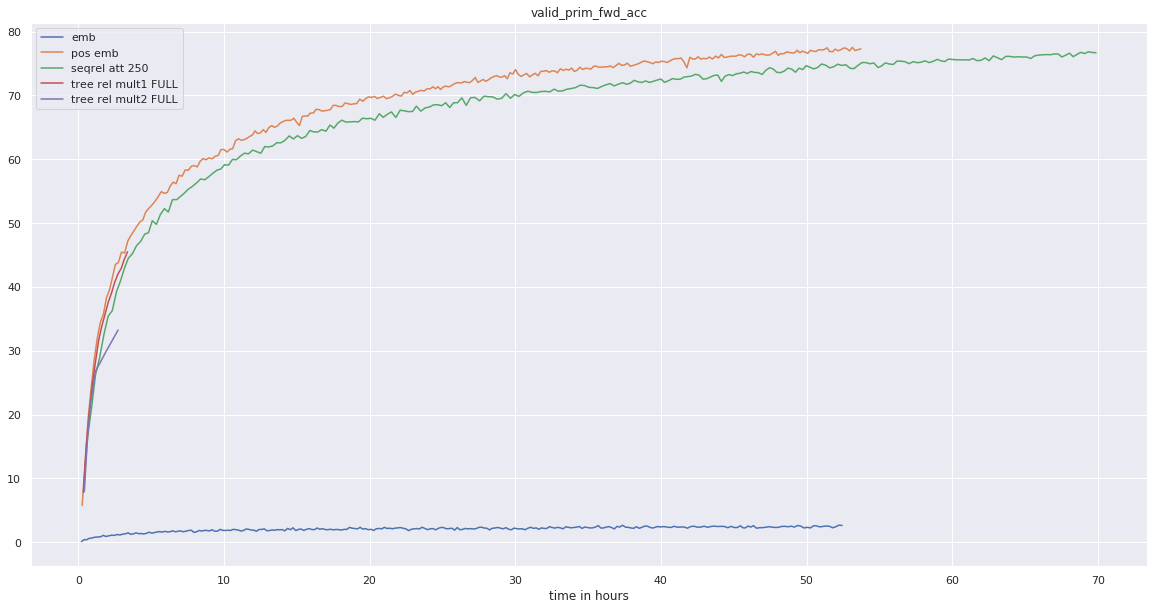

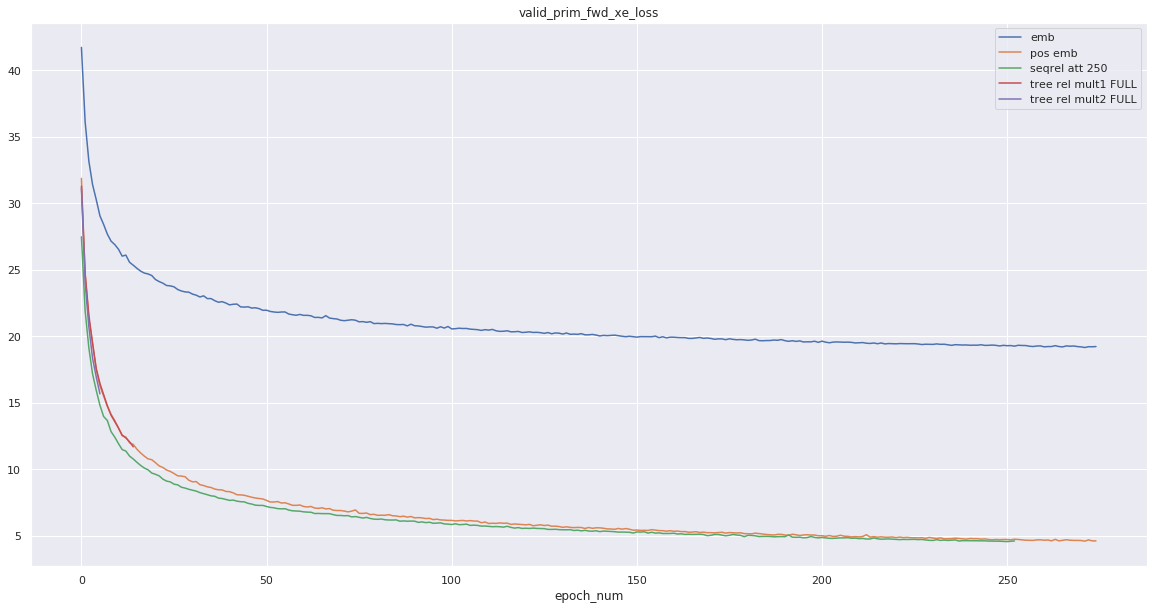

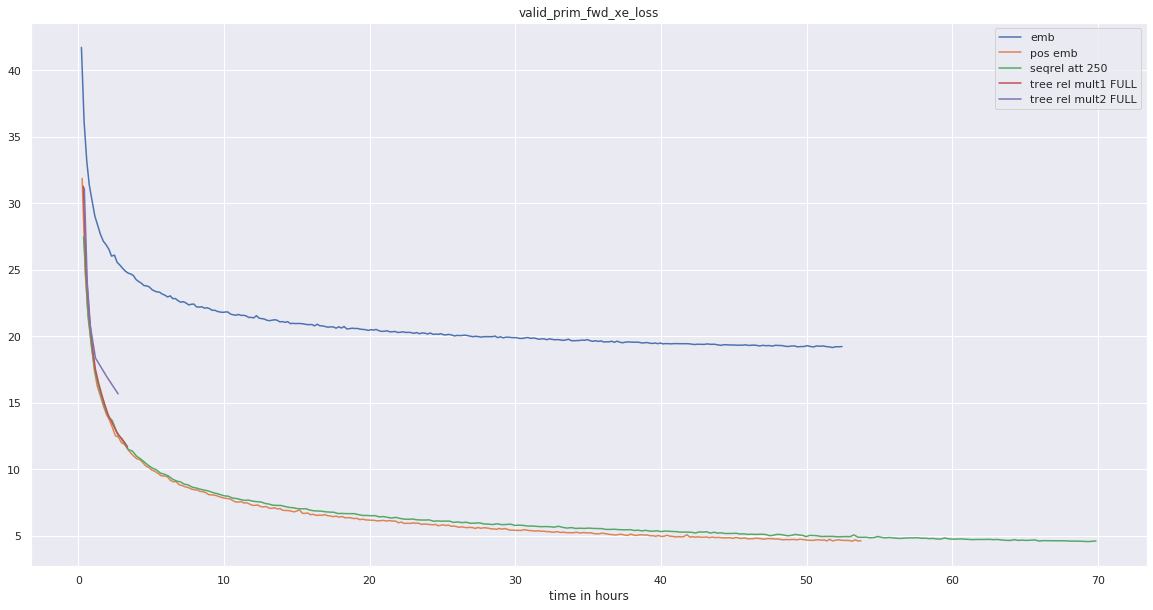

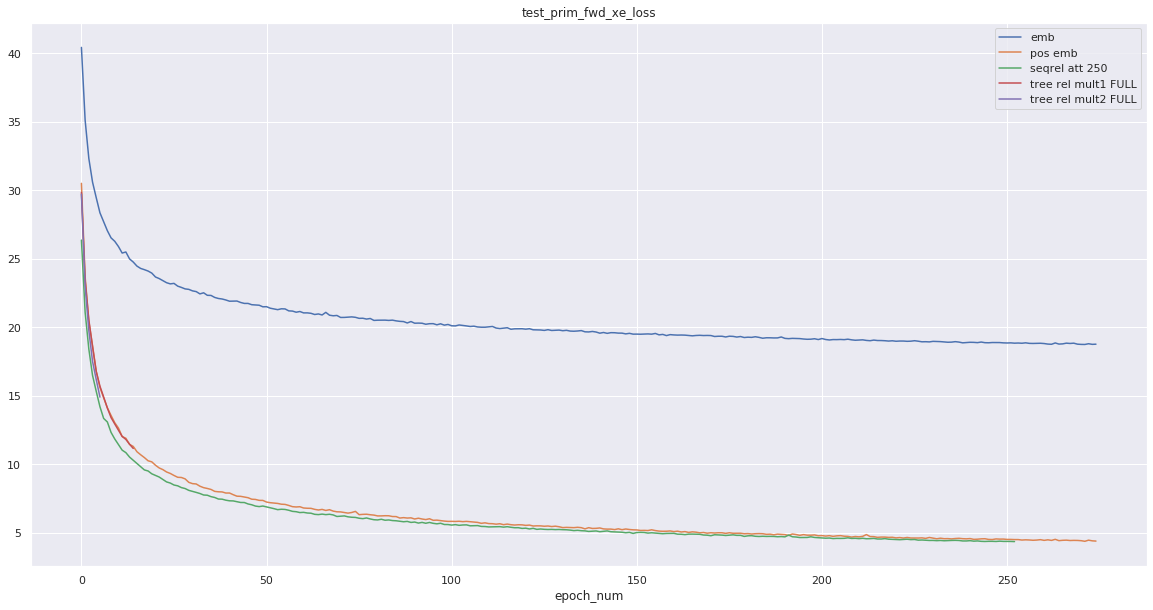

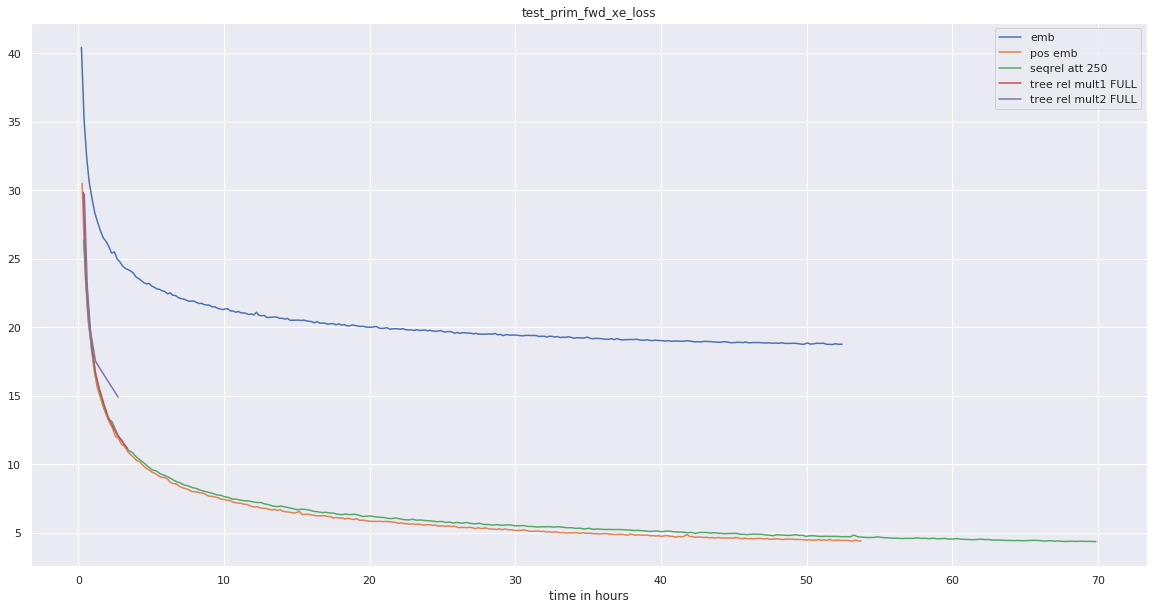

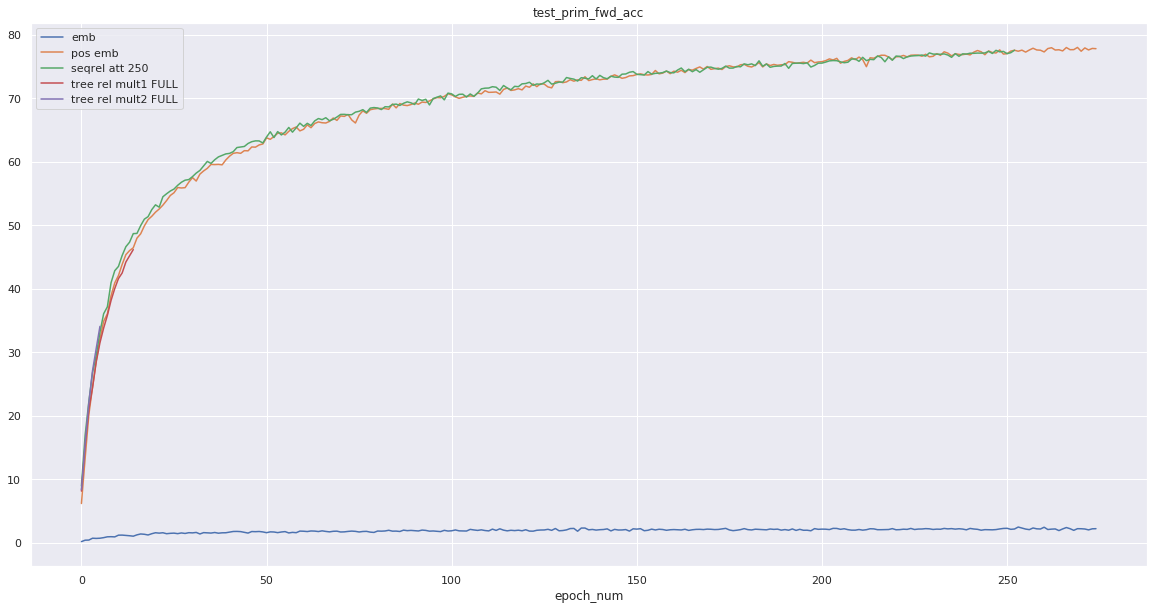

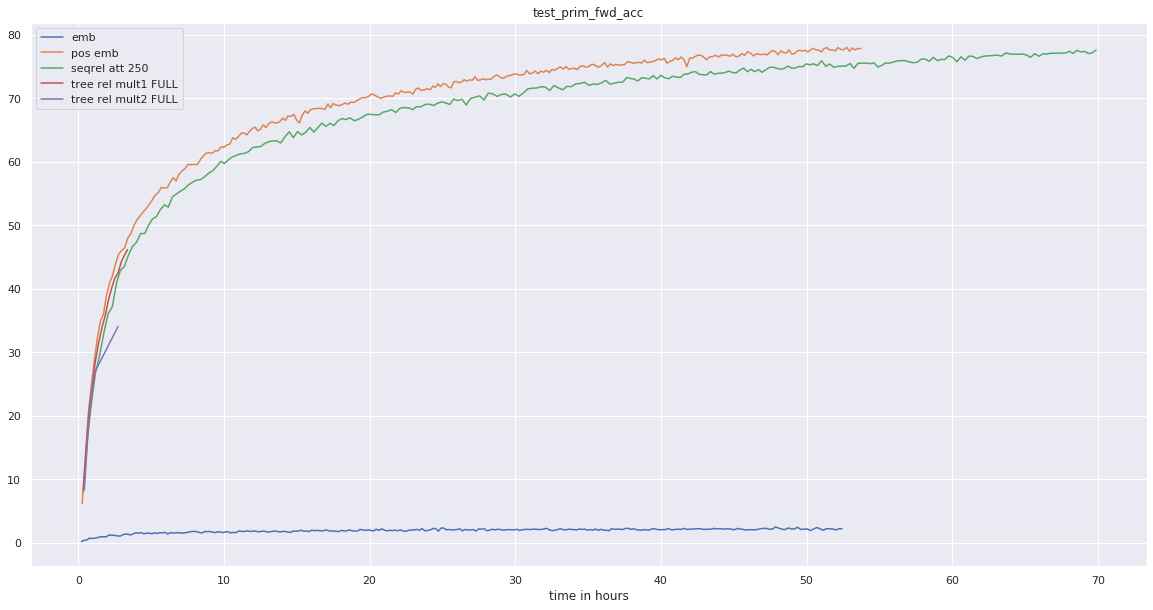

In [85]:
import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_acc', 'valid_prim_fwd_xe_loss', 'test_prim_fwd_xe_loss', 'test_prim_fwd_acc']
for key in needed:
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['epoch'],
            runs_dict[run][key], 
            label=names[run]
        )
        #plt.xlim(200, 300)
        #plt.ylim(70, 80)
        plt.xlabel('epoch_num')
        plt.title(key)
        plt.legend()
    
    plt.show()
    
    plt.figure(figsize=(20,10))
    for run in runs_dict.keys():
        plt.plot(
            runs_dict[run]['time'],
            runs_dict[run][key],
            label=names[run]
        )
        plt.xlabel('time in hours')
        plt.title(key)
        plt.legend()
            
    plt.show()

In [50]:
root = 'dumped/first_eval/'

runs = []
for filename in os.listdir(root):
    run_name = root + filename + '/train.log'
    runs.append(run_name)

FileNotFoundError: [Errno 2] No such file or directory: 'dumped/first_eval/'

In [11]:
import datetime
import json

runs_dict = {}

for name in runs:
    file = open(name)
    lines = [line.rstrip('\n') for line in file]
    whole_dict = {'time':[]}
    for line in lines:
        if '__log__' in line:
            time = line.split()[5]
            time = datetime.datetime.strptime(time, '%H:%M:%S')
            time = (time.hour * 60 + time.minute) / 60
            whole_dict['time'].append(time)

            json_line = json.loads(line[line.find('{'):])
            for key in json_line:
                if key not in whole_dict:
                    whole_dict[key] = []
                whole_dict[key].append(json_line[key])   
    runs_dict[name.split('/')[2]] = whole_dict

ValueError: time data '1' does not match format '%H:%M:%S'

In [12]:
import matplotlib.pyplot as plt


needed = ['valid_prim_fwd_beam_acc', 'test_prim_fwd_beam_acc']
for key in whole_dict:
    for run in runs_dict.keys():
        if key in needed:
            print(key, runs_dict[run][key])